## Investigation into Fatal Motor Vehicle Accidents in Australia - 1989-2021 - Pre-Processing

** This notebook was going to include all of the pre-processing to prepare the data for modelling. I found out halfway through that I don't need such a complex dataframe, I might still use this in the future. **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('df_pp.csv', sep=',', low_memory=False, index_col='Crash ID')

In [3]:
df.head()

,state,month,year,dayweek,time,crash_type,bus_involvement,articulated_truck_involvement,speed_limit,road_user,gender,age,christmas_period,easter_period,age_group,day_of_week,time_of_day,day,datetime,month_year
Crash ID,,,,,,,,,,,,,,,,,,,,
20215020,WA,4,2021,Tuesday,16:00:00,Single,No,No,80,Pedestrian,Male,3,No,No,0_to_16,Weekday,Day,1,1/04/2021 16:00,2021-04
20212067,Vic,4,2021,Thursday,18:00:00,Multiple,No,No,80,Motorcycle rider,Male,55,No,No,40_to_64,Weekday,Night,1,1/04/2021 18:00,2021-04
20213015,Qld,4,2021,Sunday,23:00:00,Single,No,No,70,Driver,Male,21,No,No,17_to_25,Weekend,Night,1,1/04/2021 23:00,2021-04
20211009,NSW,4,2021,Thursday,21:05:00,Single,No,No,110,Pedestrian,Female,21,No,No,17_to_25,Weekday,Night,1,1/04/2021 21:05,2021-04
20211054,NSW,4,2021,Saturday,4:25:00,Single,No,No,80,Passenger,Male,5,No,No,0_to_16,Weekend,Night,1,1/04/2021 4:25,2021-04


## Changing datatypes into numeric for modelling

In [4]:
df.dtypes

state                            object
month                             int64
year                              int64
dayweek                          object
time                             object
crash_type                       object
bus_involvement                  object
articulated_truck_involvement    object
speed_limit                       int64
road_user                        object
gender                           object
age                               int64
christmas_period                 object
easter_period                    object
age_group                        object
day_of_week                      object
time_of_day                      object
day                               int64
datetime                         object
month_year                       object
dtype: object

In [5]:
df.shape

(52397, 20)

### State

In [6]:
df.state.value_counts()

NSW    16200
Vic    11467
Qld    10380
WA      6209
SA      4515
NT      1623
Tas     1529
ACT      474
Name: state, dtype: int64

In [7]:
df.state.replace({'NSW': 1, 'Vic': 2, 'Qld': 3, 'WA': 4, 'SA': 5, 'NT': 6, 'Tas': 7, 'ACT': 8}, inplace=True)
df.state.value_counts()

1    16200
2    11467
3    10380
4     6209
5     4515
6     1623
7     1529
8      474
Name: state, dtype: int64

### Day of the week

In [8]:
df.dayweek.value_counts()

Saturday     9625
Friday       8590
Sunday       8402
Thursday     7028
Wednesday    6590
Tuesday      6099
Monday       6063
Name: dayweek, dtype: int64

In [9]:
dayweek_dict = {'Monday': 1, 'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday':5,'Saturday': 6,'Sunday': 7}
df.dayweek = df.dayweek.replace(dayweek_dict, inplace=False)

In [10]:
df.dayweek.value_counts()

6    9625
5    8590
7    8402
4    7028
3    6590
2    6099
1    6063
Name: dayweek, dtype: int64

### Crash Type

In [11]:
df.crash_type.value_counts()

Single      28984
Multiple    23413
Name: crash_type, dtype: int64

In [12]:
df.crash_type.replace('Single', 0, inplace=True)
df.crash_type.replace('Multiple', 1, inplace=True)
df.rename(columns = {'crash_type': 'multiple'}, inplace=True)
df.multiple.value_counts()

0    28984
1    23413
Name: multiple, dtype: int64

In [13]:
df.multiple.head()

Crash ID
20215020    0
20212067    1
20213015    0
20211009    0
20211054    0
Name: multiple, dtype: int64

### Bus Involvement

In [14]:
df.bus_involvement.value_counts()

No     51418
Yes      979
Name: bus_involvement, dtype: int64

In [15]:
df.bus_involvement.replace('No', 0, inplace=True)
df.bus_involvement.replace('Yes', 1, inplace=True)
df.rename(columns = {'bus_involvement': 'bus'}, inplace=True)
df.bus.value_counts()

0    51418
1      979
Name: bus, dtype: int64

### Articulated Truck Involvement

In [16]:
df.articulated_truck_involvement.value_counts()

No     47090
Yes     5307
Name: articulated_truck_involvement, dtype: int64

In [17]:
df.articulated_truck_involvement.replace('No', 0, inplace=True)
df.articulated_truck_involvement.replace('Yes', 1, inplace=True)
df.rename(columns = {'articulated_truck_involvement': 'truck'}, inplace=True)
df.truck.value_counts()

0    47090
1     5307
Name: truck, dtype: int64

### Speed Limit

In [18]:
df.speed_limit.value_counts()

100    18110
60     13607
80      7447
110     5959
50      2853
70      2509
90      1133
40       346
75       254
130      113
20        28
10        18
30        14
5          3
25         2
15         1
Name: speed_limit, dtype: int64

#### I am going to collate the speeds <= 40 km/h into one category and 70 and 75 together. There are enough of the rest of the speeds to remain their own categories

In [19]:
df.speed_limit.replace([5, 10, 15, 20, 25, 30], 40, inplace=True)
df.speed_limit.replace(75, 70, inplace=True)

<AxesSubplot:>

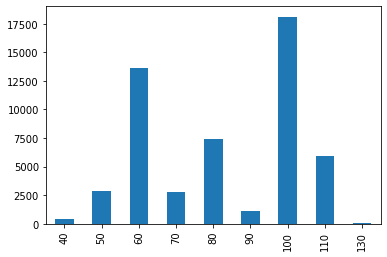

In [20]:
df.speed_limit.value_counts().sort_index().plot(kind='bar')

In [21]:
df.speed_limit.replace({40:1, 50:2, 60:3, 70:4, 80:5, 90:6, 100:7, 110:8, 130:9}, inplace=True)

In [22]:
df.speed_limit.sample(10)

Crash ID
20185082    7
20203185    3
20132170    5
19932114    3
19981020    3
19911304    7
20066034    4
20014010    3
19944090    5
19921169    7
Name: speed_limit, dtype: int64

### Road User

In [23]:
df.road_user.value_counts()

Driver                          23609
Passenger                       12270
Pedestrian                       8183
Motorcycle rider                 6564
Pedal cyclist                    1409
Motorcycle pillion passenger      362
Name: road_user, dtype: int64

In [26]:
df.road_user.replace({'Driver': 1, "Passenger": 2, 'Pedestrian': 3, 'Motorcycle rider': 4, 'Pedal cyclist': 5, 'Motorcycle pillion passenger': 6}, inplace=True)
df.road_user.value_counts()

1    23609
2    12270
3     8183
4     6564
5     1409
6      362
Name: road_user, dtype: int64

### Gender

In [27]:
df.gender.value_counts()

Male      37520
Female    14877
Name: gender, dtype: int64

In [28]:
df.gender.replace({'Male': 0, 'Female': 1}, inplace=True)
df.gender.value_counts()

0    37520
1    14877
Name: gender, dtype: int64

### Christmas Period

In [29]:
df.christmas_period.value_counts()

No     50762
Yes     1635
Name: christmas_period, dtype: int64

In [30]:
df.christmas_period.replace({'No': 0, 'Yes': 1}, inplace = True)
df.rename(columns = {'christmas_period': 'xmas'}, inplace=True)
df.xmas.value_counts()

0    50762
1     1635
Name: xmas, dtype: int64

### Easter Period

In [31]:
df.easter_period.value_counts()

No     52151
Yes      246
Name: easter_period, dtype: int64

In [32]:
df.easter_period.replace({'No': 0, 'Yes': 1}, inplace = True)
df.rename(columns = {'easter_period': 'easter'}, inplace=True)
df.easter.value_counts()

0    52151
1      246
Name: easter, dtype: int64

### Age Group

In [33]:
df.age_group.value_counts().sort_index()

0_to_16         4054
17_to_25       13689
26_to_39       12332
40_to_64       13307
65_to_74        3964
75_or_older     5051
Name: age_group, dtype: int64

In [34]:
df.age_group.replace({'0_to_16': 0, '17_to_25': 1, '26_to_39': 2, '40_to_64': 3, '65_to_74':4, '75_or_older':5}, inplace=True)
df.age_group.value_counts().sort_index()

0     4054
1    13689
2    12332
3    13307
4     3964
5     5051
Name: age_group, dtype: int64

### Day of Week

In [35]:
df.day_of_week.value_counts()

Weekday    30780
Weekend    21617
Name: day_of_week, dtype: int64

In [36]:
df.day_of_week.replace({'Weekday': 0, 'Weekend': 1}, inplace=True)
df.rename(columns={'day_of_week': 'weekend'}, inplace=True)
df.weekend.value_counts()

0    30780
1    21617
Name: weekend, dtype: int64

### Time of Day

In [37]:
df.time_of_day.value_counts()

Day      29847
Night    22550
Name: time_of_day, dtype: int64

In [38]:
df.time_of_day.replace({'Day': 0, 'Night': 1}, inplace=True)
df.rename(columns = {'time_of_day': 'night'}, inplace=True)
df.night.value_counts()

0    29847
1    22550
Name: night, dtype: int64

### Datetime

In [40]:
df.drop(columns='day', inplace=True)

In [43]:
df.datetime

Crash ID
20215020    1/04/2021 16:00
20212067    1/04/2021 18:00
20213015    1/04/2021 23:00
20211009    1/04/2021 21:05
20211054     1/04/2021 4:25
                 ...       
19892636     1/01/1989 2:20
19892179     1/01/1989 8:15
19891003    1/01/1989 21:15
19893105     1/01/1989 6:00
19893105     1/01/1989 6:00
Name: datetime, Length: 52397, dtype: object

In [44]:
df['dayweek'] = df['dayweek'].astype('str')
df['month'] = df['month'].astype('str')
df['year'] = df['year'].astype('str')

In [45]:
df['dt'] = ((df['dayweek'] + '/' + df['month'] + '/' + df['year'] + ' ' + df['time']))

In [46]:
df.dt = (pd.to_datetime(df.dt, dayfirst=True))

<AxesSubplot:>

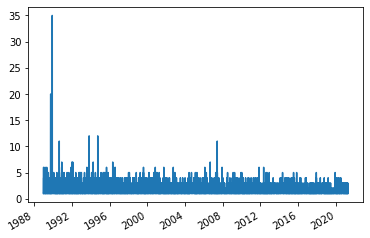

In [47]:
df.dt.value_counts().sort_index().plot()

<AxesSubplot:>

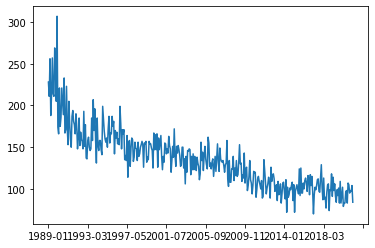

In [48]:
df.month_year.value_counts().sort_index().plot()

<AxesSubplot:xlabel='month_year', ylabel='count'>

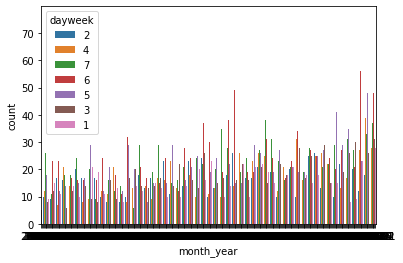

In [49]:
sns.countplot(x=df.month_year, data=df, hue=df.dayweek)

In [50]:
df_month_year = pd.DataFrame(df.month_year.value_counts())

In [51]:
dfmy = df_month_year.sort_index()

In [52]:
dfmy.head(20)

,month_year
1989-01,228
1989-02,211
1989-03,256
1989-04,188
1989-05,213
1989-06,257
1989-07,214
1989-08,211
1989-09,269
1989-10,241


In [53]:
dfmy.shape

(388, 1)

# I am going to make this df as a new csv for ease of use - I will then start a new notebook. The LSTM I am going to do will only require the monthly values.

** Everything below here was not used in the final capstone project but I am keeping for posterity as I may revisit in the future. **

In [54]:
#dfmy.to_csv('df_lstm')

In [55]:
df.month_year.value_counts().index.tolist()

['1989-12',
 '1989-09',
 '1989-06',
 '1989-03',
 '1989-10',
 '1990-09',
 '1989-01',
 '1990-12',
 '1990-06',
 '1990-03',
 '1989-07',
 '1989-05',
 '1989-08',
 '1989-02',
 '1993-10',
 '1989-11',
 '1990-07',
 '1991-03',
 '1994-10',
 '1996-08',
 '1993-12',
 '1991-08',
 '1992-10',
 '1991-12',
 '1990-08',
 '1989-04',
 '1995-10',
 '1991-07',
 '1995-06',
 '1990-05',
 '1992-04',
 '1994-03',
 '1993-08',
 '1994-11',
 '1995-12',
 '1991-09',
 '1991-04',
 '1996-09',
 '1992-12',
 '1991-10',
 '1992-01',
 '1995-11',
 '1990-04',
 '1990-01',
 '2002-05',
 '1995-05',
 '1991-01',
 '1997-01',
 '1990-11',
 '1996-11',
 '1996-02',
 '1993-11',
 '1994-12',
 '1996-04',
 '1992-06',
 '1990-10',
 '1995-08',
 '2000-03',
 '1990-02',
 '1996-12',
 '1991-11',
 '2000-07',
 '1995-09',
 '2000-05',
 '2000-12',
 '1997-05',
 '2001-10',
 '1993-04',
 '2005-12',
 '1995-03',
 '1997-11',
 '1992-03',
 '1996-03',
 '2000-09',
 '1991-05',
 '1996-06',
 '1995-01',
 '1992-07',
 '1997-12',
 '1993-09',
 '1994-06',
 '1994-07',
 '1994-01',
 '19

In [56]:
df_month_year.shape

(388, 1)

In [57]:
df.head()

,state,month,year,dayweek,time,multiple,bus,truck,speed_limit,road_user,gender,age,xmas,easter,age_group,weekend,night,datetime,month_year,dt
Crash ID,,,,,,,,,,,,,,,,,,,,
20215020,4,4,2021,2,16:00:00,0,0,0,5,3,0,3,0,0,0,0,0,1/04/2021 16:00,2021-04,2021-04-02 16:00:00
20212067,2,4,2021,4,18:00:00,1,0,0,5,4,0,55,0,0,3,0,1,1/04/2021 18:00,2021-04,2021-04-04 18:00:00
20213015,3,4,2021,7,23:00:00,0,0,0,4,1,0,21,0,0,1,1,1,1/04/2021 23:00,2021-04,2021-04-07 23:00:00
20211009,1,4,2021,4,21:05:00,0,0,0,8,3,1,21,0,0,1,0,1,1/04/2021 21:05,2021-04,2021-04-04 21:05:00
20211054,1,4,2021,6,4:25:00,0,0,0,5,2,0,5,0,0,0,1,1,1/04/2021 4:25,2021-04,2021-04-06 04:25:00


In [58]:
df_m_y = pd.DataFrame()

In [59]:
df.head()

,state,month,year,dayweek,time,multiple,bus,truck,speed_limit,road_user,gender,age,xmas,easter,age_group,weekend,night,datetime,month_year,dt
Crash ID,,,,,,,,,,,,,,,,,,,,
20215020,4,4,2021,2,16:00:00,0,0,0,5,3,0,3,0,0,0,0,0,1/04/2021 16:00,2021-04,2021-04-02 16:00:00
20212067,2,4,2021,4,18:00:00,1,0,0,5,4,0,55,0,0,3,0,1,1/04/2021 18:00,2021-04,2021-04-04 18:00:00
20213015,3,4,2021,7,23:00:00,0,0,0,4,1,0,21,0,0,1,1,1,1/04/2021 23:00,2021-04,2021-04-07 23:00:00
20211009,1,4,2021,4,21:05:00,0,0,0,8,3,1,21,0,0,1,0,1,1/04/2021 21:05,2021-04,2021-04-04 21:05:00
20211054,1,4,2021,6,4:25:00,0,0,0,5,2,0,5,0,0,0,1,1,1/04/2021 4:25,2021-04,2021-04-06 04:25:00


In [64]:
df_month_year.head()

,month_year
1989-12,307
1989-09,269
1989-06,257
1989-03,256
1989-10,241


In [65]:
df_month_year.iloc[0]

month_year    307
Name: 1989-12, dtype: int64

In [66]:
df_month_year.index[0][0:4]

'1989'

In [67]:
df_month_year.index[0][5:7]

'12'

In [68]:
(df_month_year.index[0][5:7])

'12'

In [69]:
month = []

for i in range(df_month_year.shape[0]):
    month.append(df_month_year.index[i][5:7])   

In [70]:
month

['12',
 '09',
 '06',
 '03',
 '10',
 '09',
 '01',
 '12',
 '06',
 '03',
 '07',
 '05',
 '08',
 '02',
 '10',
 '11',
 '07',
 '03',
 '10',
 '08',
 '12',
 '08',
 '10',
 '12',
 '08',
 '04',
 '10',
 '07',
 '06',
 '05',
 '04',
 '03',
 '08',
 '11',
 '12',
 '09',
 '04',
 '09',
 '12',
 '10',
 '01',
 '11',
 '04',
 '01',
 '05',
 '05',
 '01',
 '01',
 '11',
 '11',
 '02',
 '11',
 '12',
 '04',
 '06',
 '10',
 '08',
 '03',
 '02',
 '12',
 '11',
 '07',
 '09',
 '05',
 '12',
 '05',
 '10',
 '04',
 '12',
 '03',
 '11',
 '03',
 '03',
 '09',
 '05',
 '06',
 '01',
 '07',
 '12',
 '09',
 '06',
 '07',
 '01',
 '08',
 '03',
 '12',
 '09',
 '12',
 '08',
 '05',
 '07',
 '02',
 '03',
 '11',
 '03',
 '01',
 '07',
 '05',
 '03',
 '07',
 '04',
 '10',
 '12',
 '05',
 '11',
 '06',
 '01',
 '07',
 '02',
 '11',
 '04',
 '04',
 '10',
 '05',
 '11',
 '03',
 '08',
 '11',
 '08',
 '06',
 '05',
 '03',
 '04',
 '04',
 '10',
 '10',
 '03',
 '04',
 '12',
 '02',
 '08',
 '12',
 '10',
 '07',
 '05',
 '09',
 '12',
 '11',
 '01',
 '04',
 '06',
 '08',
 '10',

In [71]:
df_month_year.shape[0]

388

In [72]:
year = []

for i in range(df_month_year.shape[0]):
    year.append(df_month_year.index[i][0:4])

year

['1989',
 '1989',
 '1989',
 '1989',
 '1989',
 '1990',
 '1989',
 '1990',
 '1990',
 '1990',
 '1989',
 '1989',
 '1989',
 '1989',
 '1993',
 '1989',
 '1990',
 '1991',
 '1994',
 '1996',
 '1993',
 '1991',
 '1992',
 '1991',
 '1990',
 '1989',
 '1995',
 '1991',
 '1995',
 '1990',
 '1992',
 '1994',
 '1993',
 '1994',
 '1995',
 '1991',
 '1991',
 '1996',
 '1992',
 '1991',
 '1992',
 '1995',
 '1990',
 '1990',
 '2002',
 '1995',
 '1991',
 '1997',
 '1990',
 '1996',
 '1996',
 '1993',
 '1994',
 '1996',
 '1992',
 '1990',
 '1995',
 '2000',
 '1990',
 '1996',
 '1991',
 '2000',
 '1995',
 '2000',
 '2000',
 '1997',
 '2001',
 '1993',
 '2005',
 '1995',
 '1997',
 '1992',
 '1996',
 '2000',
 '1991',
 '1996',
 '1995',
 '1992',
 '1997',
 '1993',
 '1994',
 '1994',
 '1994',
 '1997',
 '1993',
 '2007',
 '1999',
 '1998',
 '1992',
 '1999',
 '1998',
 '1995',
 '1998',
 '2000',
 '2005',
 '2006',
 '1995',
 '2001',
 '1999',
 '1997',
 '1999',
 '1999',
 '2006',
 '1996',
 '1999',
 '2001',
 '1999',
 '1996',
 '1991',
 '1998',
 '2009',
 

In [73]:
df_month_year['year'] = year

In [74]:
df_month_year['month'] = month

In [75]:
df_month_year.head()

,month_year,year,month
1989-12,307,1989,12
1989-09,269,1989,09
1989-06,257,1989,06
1989-03,256,1989,03
1989-10,241,1989,10


In [76]:
df_month_year = df_month_year.sort_index()

In [77]:
df_month_year.head()

,month_year,year,month
1989-01,228,1989,01
1989-02,211,1989,02
1989-03,256,1989,03
1989-04,188,1989,04
1989-05,213,1989,05


Text(0, 0.5, 'Year')

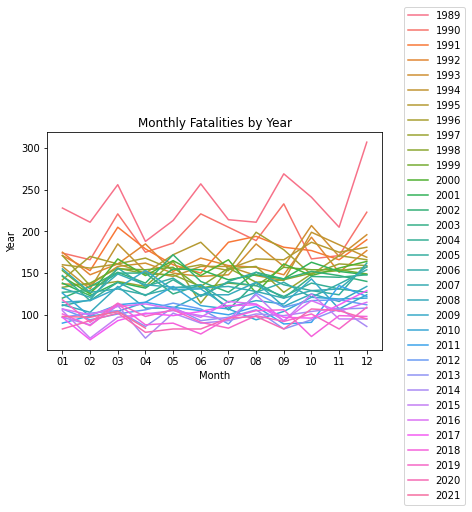

In [78]:
sns.lineplot(x='month', y='month_year', data=df_month_year, hue='year')
plt.legend(bbox_to_anchor = (1.05, 1.6))
plt.title('Monthly Fatalities by Year')
plt.xlabel('Month')
plt.ylabel('Year')

# LSTM Modelling

In [79]:
dfmy.head()

,month_year
1989-01,228
1989-02,211
1989-03,256
1989-04,188
1989-05,213


In [80]:
for j in (range(1,12)):
    dfmy['lag_' + str(j)] = dfmy.iloc[:,j-1].shift(1)

In [81]:
dfmy.head(20)

,month_year,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
1989-01,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-02,211,228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-03,256,211.0,228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-04,188,256.0,211.0,228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-05,213,188.0,256.0,211.0,228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-06,257,213.0,188.0,256.0,211.0,228.0,NaN,NaN,NaN,NaN,NaN,NaN
1989-07,214,257.0,213.0,188.0,256.0,211.0,228.0,NaN,NaN,NaN,NaN,NaN
1989-08,211,214.0,257.0,213.0,188.0,256.0,211.0,228.0,NaN,NaN,NaN,NaN
1989-09,269,211.0,214.0,257.0,213.0,188.0,256.0,211.0,228.0,NaN,NaN,NaN
1989-10,241,269.0,211.0,214.0,257.0,213.0,188.0,256.0,211.0,228.0,NaN,NaN


In [82]:
#Reducing the first year down to get rid of null values
dfmy = dfmy.iloc[11:, :]

In [83]:
data_my = dfmy.values

In [84]:
data_my.shape

(377, 12)

In [ ]:
#dfmy.to_csv('df_my')